<a target="_blank" href="https://colab.research.google.com/github/trainocate-japan/Machine-Learning-and-Deep-Learning-Hands-on/blob/main/answer/4_決定木_ランダムフォレスト/4-3_ランダムフォレストによる戸建ての価格予測.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


# 4-3_ランダムフォレストによる戸建ての価格予測

このノートブックでは、決定木の発展アルゴリズムであるランダムフォレストを用いて予測モデルを作成します。

予測を行うテーマは決定木と同じ戸建て物件の価格を予測することです。

ランダムフォレストも回帰にも分類にも用いることができ、用途に応じて以下の二つのモデルを使い分けます。
- 回帰：sklearn.ensemble.RandomForestRegressor
- 分類：sklearn.ensemble.RandomForestClassifier

[ランダムフォレストのAPIドキュメント](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble)

## ライブラリのインポート

In [1]:
# データを処理するための基本的なライブラリ
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
# ランダムフォレストモデルをインポート
from sklearn.ensemble import RandomForestRegressor

In [3]:
# matplotlibで日本語表示するための設定
!pip install japanize_matplotlib | tail -n 1
import japanize_matplotlib

## データの準備
mlho/data/totsuka_kodate.csvファイルを読み込みます<br>
(決定木と同じなので省略しています)

In [ ]:
# データの読み込み。mlho/data/totsuka_kodate.csv
totsuka_kodate = pd.read_csv("totsuka_kodate.csv")
# 説明変数と目的変数の切り分け
x = pd.get_dummies( totsuka_kodate[['築年数','最寄駅距離（分）','延床面積（㎡）','面積（㎡）','前面道路幅員（ｍ）','地区名', '前面道路種類', '土地の形状']])
y = totsuka_kodate['取引価格']
# 訓練データと検証データに分割(70%を訓練用に使用)
train_x, val_x, train_y, val_y = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=8)

## モデルの定義

In [6]:
model = RandomForestRegressor(random_state=0)

## モデルの学習

In [7]:
model.fit(train_x,train_y)

RandomForestRegressor(random_state=0)

## 評価

In [8]:
# 訓練データで精度を確認してみる
model.score(train_x, train_y)

0.935

In [9]:
# 検証データで精度を確認してみる
model.score(val_x, val_y)

0.669

ランダムフォレストはデフォルトのハイパーパラメータでも、過剰適合が起きにくく、よい精度が出やすいことが強力な長所です。

# ランダムフォレストモデルのパラメータチューニング

ランダムフォレストのハイパーパラメータを調整します。

ランダムフォレストのハイパーパラメータのうち特に重要なハイパーパラメータは以下です
- **n_estimators:**決定木の数
- **max_features:**個々の決定木で採用する説明変数の数
- **max_depth:**個々の決定木の最大の深さ
- **max_leaf_nodes:**個々の木に含まれる葉ノードの数の最大

[ランダムフォレストのAPIドキュメント](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble)

In [10]:
# ハイパーパラメータを変えて、精度の変化を確認してみましょう
model = RandomForestRegressor(n_estimators=200, max_depth=13, max_features=15, random_state=0)
model.fit(train_x,train_y)

RandomForestRegressor(max_depth=13, max_features=15, n_estimators=200,
                      random_state=0)

In [11]:
# 訓練データで精度を確認してみる
model.score(train_x, train_y)

0.933

In [12]:
# 検証データで精度を確認してみる
model.score(val_x, val_y)

0.720

**※ 調整例**

`model = RandomForestRegressor(n_estimators=200, max_depth=13, max_features=15, random_state=0)`

過学習を抑制して72%程の精度が出ます。

## 特徴量（説明変数）の重要度を確認する
ランダムフォレストでも木の作成に使われた特徴量（説明変数）のうち重要なものが何であったかを定量的に出力することもできます。<br>
決定木の場合と比べると、それぞれの木が別の特徴量を使用して予測を行うため、より多くの情報から重要度を考えることができます。

In [13]:
# 特徴量重要度
importances= model.feature_importances_
df_importances =pd.DataFrame(data=importances, index=train_x.columns)
df_importances.sort_values(0, ascending=False)

,0
築年数,0.30874
最寄駅距離（分）,0.17904
延床面積（㎡）,0.14104
面積（㎡）,0.08971
前面道路幅員（ｍ）,0.06663
地区名_戸塚町,0.03056
地区名_下倉田町,0.01955
土地の形状_ほぼ長方形,0.01768
地区名_矢部町,0.01609
地区名_上矢部町,0.01570


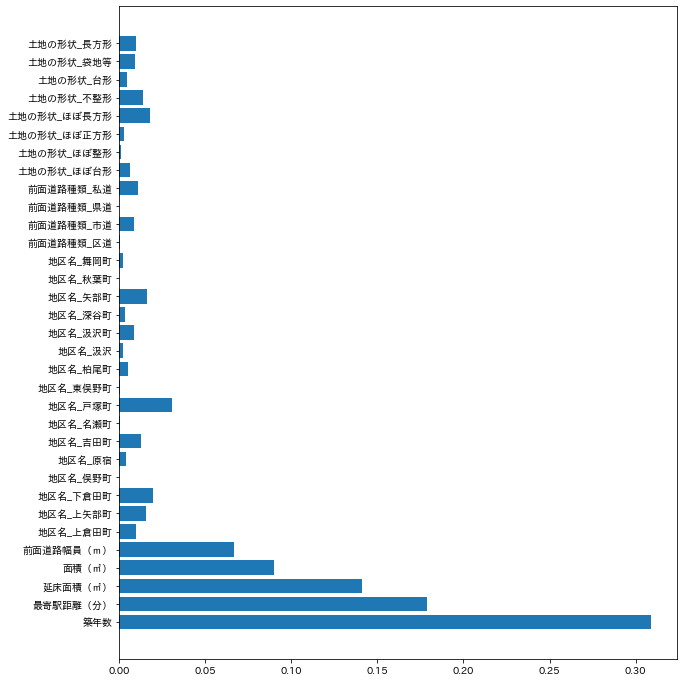

In [14]:
# （参考）matplotlibで棒グラフにする
plt.figure(figsize=(10,12))
n_features = train_x.shape[1] # 特徴量の数
plt.barh(range(n_features), model.feature_importances_, align='center')
plt.yticks(np.arange(n_features), train_x.columns)
plt.plot;

## （参考）正解値と予測値の関係性を可視化してみる
精度として72%という値が出るようになりましたが、これはどれくらい当たっているといえるのでしょうか？<br>
実用できるレベルなのでしょうか？<br>
72%という精度がどれほどデータの傾向をとらえられているのか、以下のように可視化をすることで、ある程度直感的に理解をすることができます。
- 横軸に正解値、縦軸に予測値をとっている
- 二つの値が一致していれば中心の線の上に乗る
- 中心線からどれだけ散らばっているか、大きくそれている点がないかによって、許容できる誤差範囲なのかを確認できる

これは、Observed-Predicted Plotと呼ばれる手法で、評価指標ではありませんが直感的に回帰予測を評価する方法として使われます。


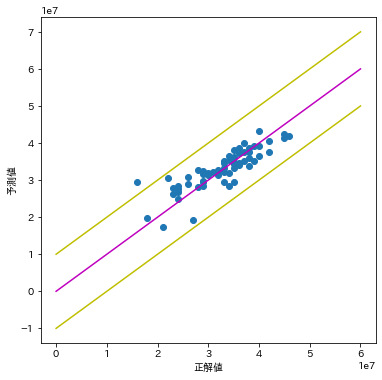

In [15]:
fig = plt.figure() # グラフの描画領域全体のオブジェクトを取得
fig.set_figheight(6) # 縦の幅を指定
fig.set_figwidth(6) # 横の幅を指定
plt.scatter(val_y, model.predict(val_x)) # 正解値と予測値の関係を散布図で描画
plt.xlabel('正解値') # x軸
plt.ylabel('予測値') # y軸
plt.plot([0, 60000000], [0, 60000000], color='m') # 0～6000万の領域に中心線を引く。色はマゼンタ
plt.plot([0, 60000000], [10000000, 70000000], color='y') # +1000万円の誤差ライン。色はイエロー
plt.plot([0, 60000000], [-10000000, 50000000], color='y') # -1000万円の誤差ライン。色はイエロー
plt.show(); # グラフの表示

このノートブックは以上です。